<a href="https://colab.research.google.com/github/pachecas/Multiclass-Neural-Network/blob/main/AP_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#*****BPM(beats/minute of favorite genre) and if it increases or decreases moods*****

#assumptions
  #home life not taken into consideration
  #age has no impact
  #diagnosis of mental disorder not recorded

#method: multiclass classification neuro networks

(array([ 11.,   0.,   0.,   0.,   0.,  97.,   0.,   0.,   0., 323.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

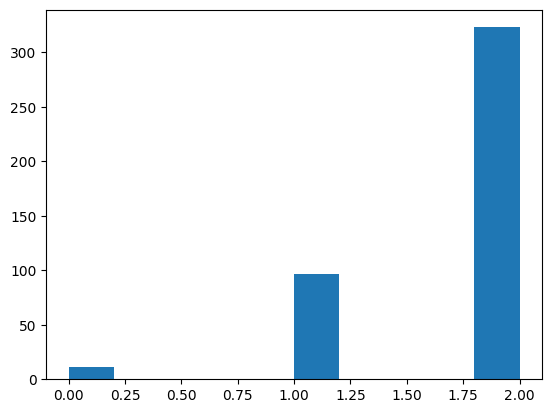

In [ ]:
from sqlalchemy.sql.expression import null
#multiclass search
import numpy as np
import torch
from matplotlib import pyplot as plt
from torch.utils import data
import pandas as pd
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

#read and clean dataset
df = pd.read_csv("mxmh_survey_results.csv",na_values=['#DIV/0!'])
df = df.dropna()

df2 = df.replace('Improve',2)
df3 = df2.replace('No effect',1)
df4 = df3.replace('Worsen',0)

#seperating columns into dependent and independent
df['Music effects'].unique()
X_df= df[['BPM','Anxiety','Depression','Insomnia','OCD']]
Y_df= df4[['Music effects']]

#trial 1
scaler= StandardScaler()
scaled= scaler.fit_transform(X_df)
X_df_std= pd.DataFrame(scaled, columns=X_df.columns)


#logistic regression
X_train, X_test, Y_train, Y_test= train_test_split(X_df_std, Y_df, test_size=0.3, random_state= 563)

#plotting original information into columns
plt.hist(Y_train)


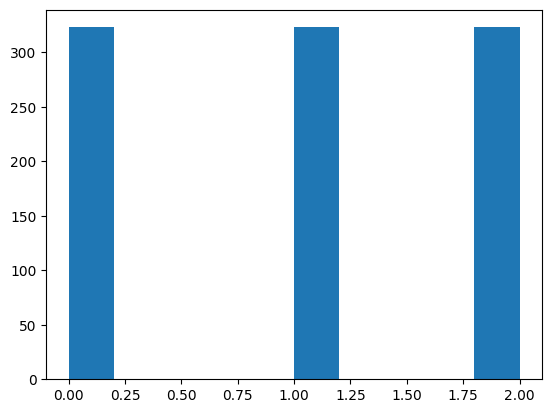

In [ ]:
#imaginary values
sm= SMOTE()
X_res, Y_res= sm.fit_resample(X_train, Y_train)

#plotting updated information
plt.hist(Y_res)
Y_res= pd.get_dummies(Y_res, columns=['Music effects'], drop_first=False)

epoch 50000, loss 1.000000
tensor([0., 0., 1.], grad_fn=<SliceBackward0>)
tensor([0., 0., 1.])


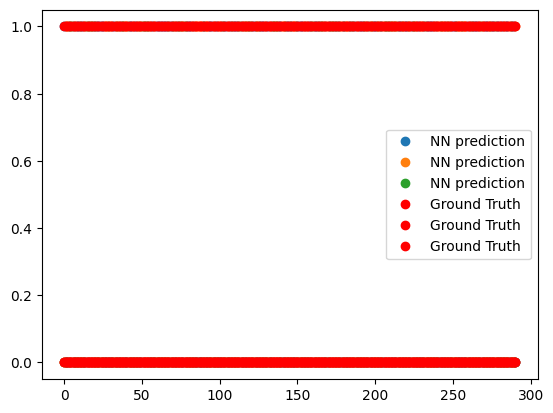

In [ ]:
#establishing dependent and independent while converting to floating points
Y= torch.tensor(Y_res[['Music effects_0', 'Music effects_1', 'Music effects_2']].values,dtype=torch.float32)
X= torch.tensor(X_res[['BPM','Anxiety','Depression','Insomnia','OCD']].values, dtype=torch.float32)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=563)

#creating neural networks
net = nn.Sequential(nn.Linear(in_features=5,out_features=10),nn.ReLU(),
                    nn.Linear(in_features=10,out_features=10),nn.ReLU(),
                    nn.Linear(in_features=10,out_features=3),nn.Softmax(dim=1))
net[0].weight.data.normal_(0,0.1)
net[0].bias.data.fill_(0)

#calculating the loss
loss= nn.CrossEntropyLoss()
trainer= torch.optim.Adam(net.parameters(), lr= .0001)

num_epochs= 50000

for epoch in range(num_epochs):
    ytrain_NN = net(X_train)
    l = loss(ytrain_NN,Y_train)
    trainer.zero_grad()
    l.backward()
    trainer.step()

#checking the loss at each epoch
print(f'epoch {epoch+1}, loss {1:f}')

#model performing on a testing set
ytest_NN= net(X_test)
idx= torch.argmax(ytest_NN, dim=1, keepdims=True)
NNpred= torch.zeros_like(ytest_NN).scatter_(1,idx, 1)
print(ytest_NN[10,:])
print(NNpred[10,:])

#plotting
plt.plot(NNpred,'o',label="NN prediction")
plt.plot(Y_test,'or',label="Ground Truth")
plt.legend()

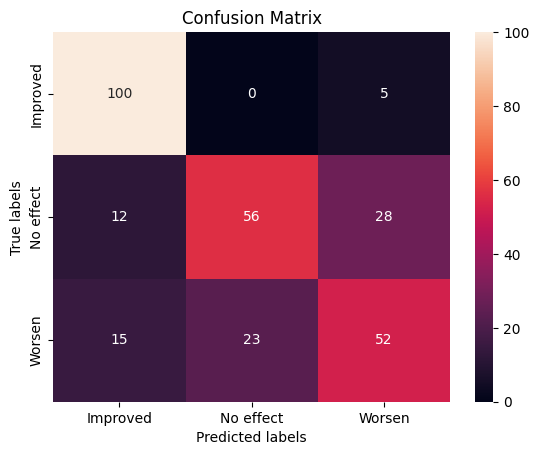

In [ ]:
#Forming Confusion Matrix Image
cfm = confusion_matrix(Y_test.argmax(axis=1),ytest_NN.argmax(axis=1))
T3_lables = ["Improved","No effect","Worsen"]

ax= plt.subplot()

sns.heatmap(cfm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T3_lables); ax.yaxis.set_ticklabels(T3_lables);

In [ ]:
#testing the confusion matrix
#checking the accuracy
print('The accuracy according to the method is: ')
a=accuracy_score(Y_test.argmax(axis=1),ytest_NN.argmax(axis=1), normalize= True )
#a=accuracy_score(ytest_NN.argmax(axis=1),NNpred.argmax(axis=1))
print(a)

The accuracy according to the method is: 
0.7147766323024055


In [ ]:
#checking the recall
print('\nThe recall according to the method is: ')
r= recall_score(Y_test.argmax(axis=1),ytest_NN.argmax(axis=1),average=None)
#recall_score(Y_test.argmax(axis=1),ytest_NN.argmax(axis=1))
print(r)


The recall according to the method is: 
[0.95238095 0.58333333 0.57777778]


In [ ]:
#checking the precision
print('\nThe precision according to the method is: ')
s=precision_score(Y_test.argmax(axis=1),ytest_NN.argmax(axis=1), average=None)
print(s)


The precision according to the method is: 
[0.78740157 0.70886076 0.61176471]


In [ ]:
#checking the specificity
print('\nThe specificity calculated is: ')
#(true worsen + no effect worsen (predicted) + no effect worsen (actual) + true no effect)
# / (true worsen + no effect worsen (predicted) + no effect worsen (actual) + true no effect) + (false no effect + false worsten)
specificity= (56+28+23+52)/((56+28+23+52)+(12+15))
print(specificity)


The specificity calculated is: 
0.8548387096774194
